Pleiades:
raw data: 1367
data within 0.1 error: 1280


/Users/panzhiwei/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less


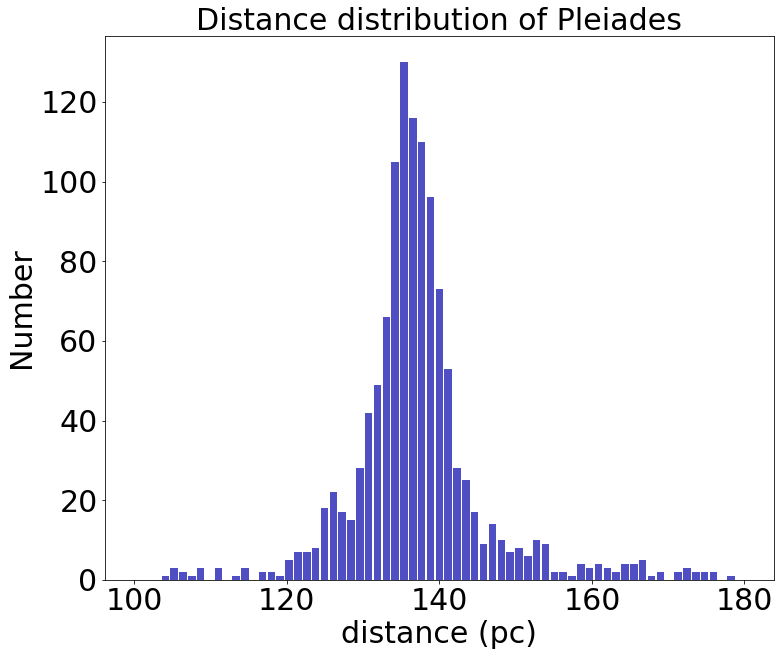

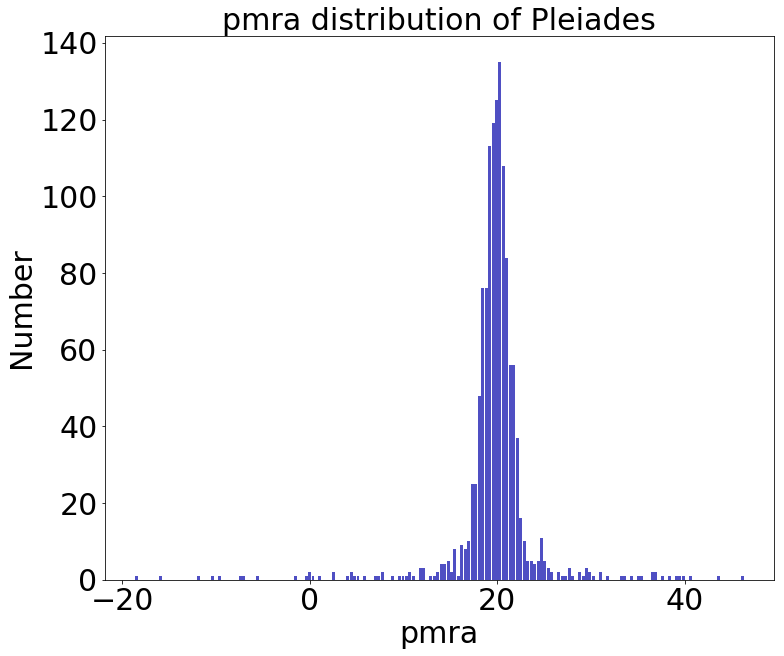

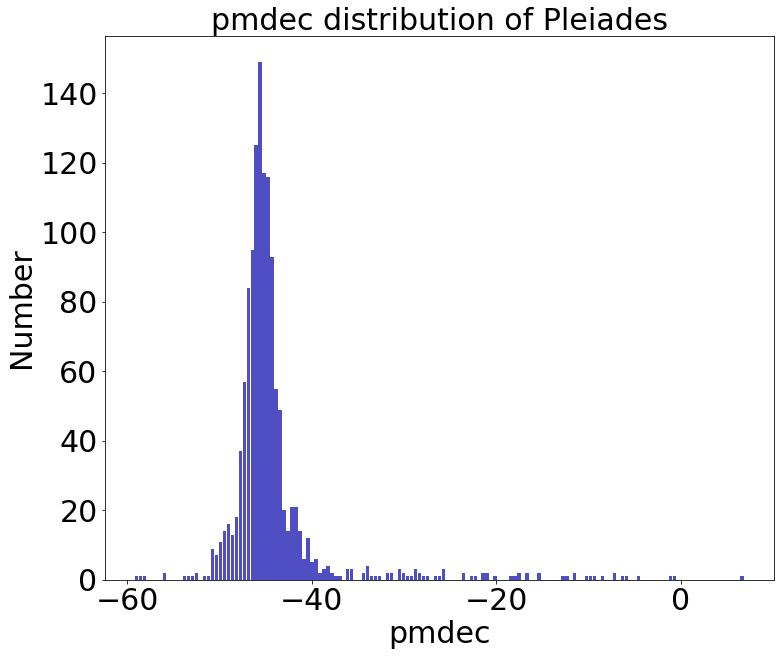

cluster member: 682 

Hyades:
raw data: 742
data within 0.1 error: 735
data in cluster: 329 

NGC752:
raw data: 247
data within 0.1 error: 223
data in cluster: 83 



/Users/panzhiwei/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in less
/Users/panzhiwei/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:144: RuntimeWarning: invalid value encountered in less


In [153]:
from astropy.io import fits 
import numpy as np 
import matplotlib.pyplot as plt 
import math
import pandas as pd 

font=30

#import fits data
Pleiades_fits=fits.open('Greg_HW2_3_data-master/Pleiades_Gaia.fits')
Hyades_fits=fits.open('Greg_HW2_3_data-master/Hyades_Gaia.fits')
NGC752_fits=fits.open('Greg_HW2_3_data-master/NGC752_Gaia.fits')
Pleiades=Pleiades_fits[1].data
Hyades=Hyades_fits[1].data
NGC752=NGC752_fits[1].data

### raw Pleiades data
bprp_Pleiades=Pleiades['bp_rp']
Gmag_Pleiades=Pleiades['phot_g_mean_mag']
plx_Pleiades=Pleiades['parallax']
plx_err_Pleiades=Pleiades['parallax_error']
pmra_Pleiades=Pleiades['pmra']
pmdec_Pleiades=Pleiades['pmdec']
print('Pleiades:')
print('raw data:',len(Gmag_Pleiades))

### delete data whose plx relative error>0.1
index_Pleiades=(plx_err_Pleiades/plx_Pleiades<0.1)
plx_Pleiades=plx_Pleiades[index_Pleiades]
Gmag_Pleiades=Gmag_Pleiades[index_Pleiades]
bprp_Pleiades=bprp_Pleiades[index_Pleiades]
pmra_Pleiades=pmra_Pleiades[index_Pleiades]
pmdec_Pleiades=pmdec_Pleiades[index_Pleiades]
print('data within 0.1 error:',len(Gmag_Pleiades))

### choose cluster mumbers
distance_Pleiades=1000/plx_Pleiades
# plot distance distribution of Pleiades
plt.figure(figsize=(12,10))
n, bins, patches = plt.hist(x=distance_Pleiades, bins='auto',range=[100,180],color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Distance distribution of Pleiades',fontsize=font)
plt.xlabel('distance (pc)',fontsize=font)
plt.ylabel('Number',fontsize=font)
plt.tick_params(labelsize=font)
plt.savefig('Distance_Pleiades.png',format='png')
plt.show()
# plot pmra distribution of Pleiades
plt.figure(figsize=(12,10))
n, bins, patches = plt.hist(x=pmra_Pleiades, bins='auto',color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('pmra distribution of Pleiades',fontsize=font)
plt.xlabel('pmra',fontsize=font)
plt.ylabel('Number',fontsize=font)
plt.tick_params(labelsize=font)
plt.savefig('pmra_Pleiades.png',format='png')
plt.show()
# plot pmdec distribution of Pleiades
plt.figure(figsize=(12,10))
n, bins, patches = plt.hist(x=pmdec_Pleiades, bins='auto',color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('pmdec distribution of Pleiades',fontsize=font)
plt.xlabel('pmdec',fontsize=font)
plt.ylabel('Number',fontsize=font)
plt.tick_params(labelsize=font)
plt.savefig('pmdec_Pleiades.png',format='png')
plt.show()
# choose the radius of cluster according to FWHM
index_Pleiades=((distance_Pleiades>132) & (distance_Pleiades<140) &\
                (pmra_Pleiades>15) & (pmra_Pleiades<25) & (pmdec_Pleiades>-50) & (pmdec_Pleiades<-40) )
distance_Pleiades_cluster=distance_Pleiades[index_Pleiades]
Gmag_Pleiades_cluster=Gmag_Pleiades[index_Pleiades]
bprp_Pleiades_cluster=bprp_Pleiades[index_Pleiades]
pmra_Pleiades_cluster=pmra_Pleiades[index_Pleiades]
pmdec_Pleiades_cluster=pmdec_Pleiades[index_Pleiades]
G_abs_Pleiades_cluster=Gmag_Pleiades_cluster+5-5*np.log10(distance_Pleiades_cluster)
print('cluster member:',len(Gmag_Pleiades_cluster),'\n')



### raw Hyades data
bprp_Hyades=Hyades['bp_rp']
Gmag_Hyades=Hyades['phot_g_mean_mag']
plx_Hyades=Hyades['parallax']
plx_err_Hyades=Hyades['parallax_error']
pmra_Hyades=Hyades['pmra_2a']
pmdec_Hyades=Hyades['pmdec']
print('Hyades:')
print('raw data:',len(Gmag_Hyades))

### delete data whose plx relative error>0.1
index_Hyades=(plx_err_Hyades/plx_Hyades<0.1)
plx_Hyades=plx_Hyades[index_Hyades]
Gmag_Hyades=Gmag_Hyades[index_Hyades]
bprp_Hyades=bprp_Hyades[index_Hyades]
pmra_Hyades=pmra_Hyades[index_Hyades]
pmdec_Hyades=pmdec_Hyades[index_Hyades]
print('data within 0.1 error:',len(Gmag_Hyades))

### choose the radius of cluster according to FWHM
distance_Hyades=1000/plx_Hyades
'''
# plot distance distribution of Hyades
plt.figure(figsize=(12,10))
n, bins, patches = plt.hist(x=distance_Hyades, bins='auto',range=[20,80],color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Distance distribution of Hyades',fontsize=font)
plt.xlabel('distance (pc)',fontsize=font)
plt.ylabel('Number',fontsize=font)
plt.tick_params(labelsize=font)
plt.show()
# plot pmra distribution of Hyades
plt.figure(figsize=(12,10))
n, bins, patches = plt.hist(x=pmra_Hyades, bins='auto',color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('pmra distribution of Hyades',fontsize=font)
plt.xlabel('pmra',fontsize=font)
plt.ylabel('Number',fontsize=font)
plt.tick_params(labelsize=font)
plt.show()
# plot pmdec distribution of Hyades
plt.figure(figsize=(12,10))
n, bins, patches = plt.hist(x=pmdec_Hyades, bins='auto',color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('pmdec distribution of Hyades',fontsize=font)
plt.xlabel('pmdec',fontsize=font)
plt.ylabel('Number',fontsize=font)
plt.tick_params(labelsize=font)
plt.show()
'''
index_Hyades=((distance_Hyades>44) & (distance_Hyades<52) &\
             (pmra_Hyades>0) & (pmra_Hyades<200) & (pmdec_Hyades>-100) & (pmdec_Hyades<100))
distance_Hyades_cluster=distance_Hyades[index_Hyades]
Gmag_Hyades_cluster=Gmag_Hyades[index_Hyades]
bprp_Hyades_cluster=bprp_Hyades[index_Hyades]
G_abs_Hyades_cluster=Gmag_Hyades_cluster+5-5*np.log10(distance_Hyades_cluster)
print('data in cluster:',len(Gmag_Hyades_cluster),'\n')



### raw NGC752 data
bprp_NGC752=NGC752['bp_rp']
Gmag_NGC752=NGC752['phot_g_mean_mag']
plx_NGC752=NGC752['parallax']
plx_err_NGC752=NGC752['parallax_error']
pmra_NGC752=NGC752['pmra']
pmdec_NGC752=NGC752['pmdec']
print('NGC752:')
print('raw data:',len(Gmag_NGC752))

### delete data whose relative error>0.1
index_NGC752=(plx_err_NGC752/plx_NGC752<0.1)
plx_NGC752=plx_NGC752[index_NGC752]
Gmag_NGC752=Gmag_NGC752[index_NGC752]
bprp_NGC752=bprp_NGC752[index_NGC752]
pmra_NGC752=pmra_NGC752[index_NGC752]
pmdec_NGC752=pmdec_NGC752[index_NGC752]
print('data within 0.1 error:',len(Gmag_NGC752))

### choose the members of cluster according to FWHM
distance_NGC752=1000/plx_NGC752
'''
# plot distance distribution of NGC752
plt.figure(figsize=(12,10))
n, bins, patches = plt.hist(x=distance_NGC752, bins='auto',range=[400,500],color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('Distance distribution of NGC752',fontsize=font)
plt.xlabel('distance (pc)',fontsize=font)
plt.ylabel('Number',fontsize=font)
plt.tick_params(labelsize=font)
plt.show()
# plot pmra distribution of NGC752
plt.figure(figsize=(12,10))
n, bins, patches = plt.hist(x=pmra_NGC752, bins='auto',color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('pmra distribution of NGC752',fontsize=font)
plt.xlabel('pmra',fontsize=font)
plt.ylabel('Number',fontsize=font)
plt.tick_params(labelsize=font)
plt.show()
# plot pmdec distribution of NGC752
plt.figure(figsize=(12,10))
n, bins, patches = plt.hist(x=pmdec_NGC752, bins='auto',color='#0504aa',alpha=0.7, rwidth=0.85)
plt.title('pmdec distribution of NGC752',fontsize=font)
plt.xlabel('pmdec',fontsize=font)
plt.ylabel('Number',fontsize=font)
plt.tick_params(labelsize=font)
plt.show()
'''
index_NGC752=((distance_NGC752>435) & (distance_NGC752<460) &\
             (pmra_NGC752>8) & (pmra_NGC752<12) & (pmdec_NGC752>-13) & (pmdec_NGC752<-10))
distance_NGC752_cluster=distance_NGC752[index_NGC752]
Gmag_NGC752_cluster=Gmag_NGC752[index_NGC752]
bprp_NGC752_cluster=bprp_NGC752[index_NGC752]
G_abs_NGC752_cluster=Gmag_NGC752_cluster+5-5*np.log10(distance_NGC752_cluster)
pmra_NGC752_cluster=pmra_NGC752[index_NGC752]
pmdec_NGC752_cluster=pmdec_NGC752[index_NGC752]
print('data in cluster:',len(Gmag_NGC752_cluster),'\n')

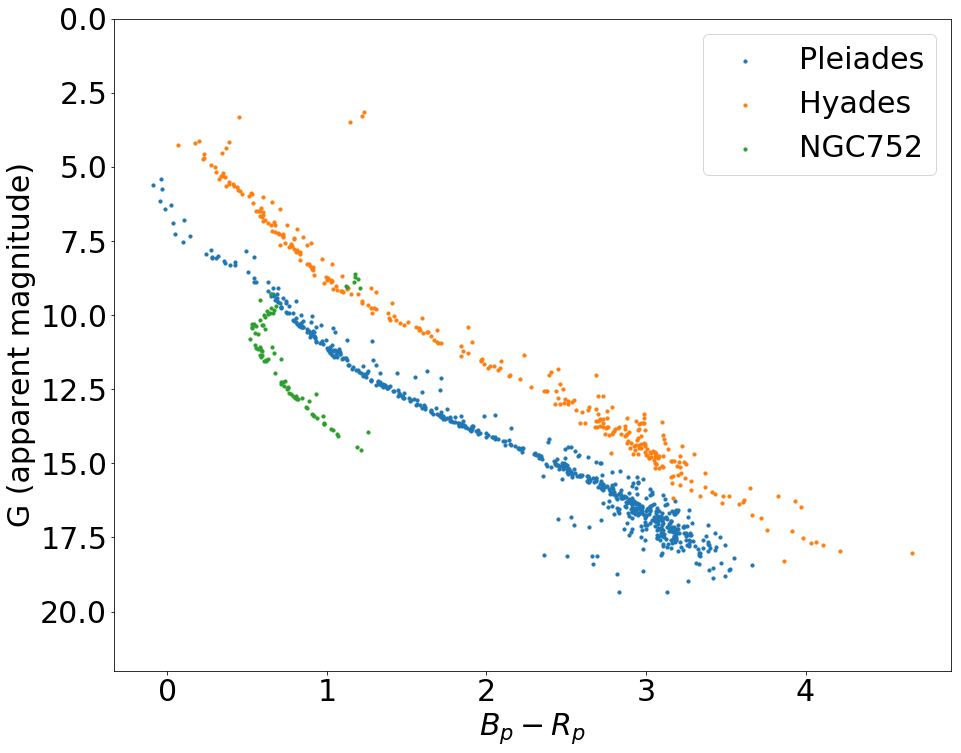

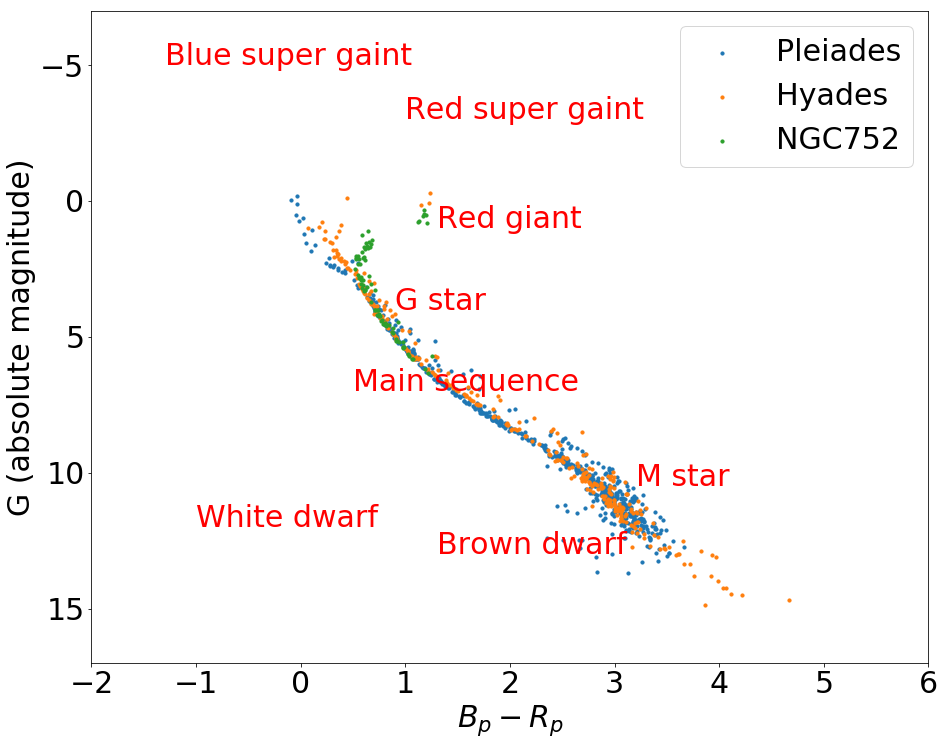

In [154]:
####plot HR diagram
plt.figure(figsize=(15,12))
plt.scatter(bprp_Pleiades_cluster,Gmag_Pleiades_cluster,s=10,label='Pleiades')
plt.scatter(bprp_Hyades_cluster,Gmag_Hyades_cluster,s=10,label='Hyades')
plt.scatter(bprp_NGC752_cluster,Gmag_NGC752_cluster,s=10,label='NGC752')
plt.ylim(22,0)
plt.legend(fontsize=font)
plt.tick_params(labelsize=font)
plt.xlabel('$B_{p}-R_{p}$',fontsize=font)
plt.ylabel('G (apparent magnitude)',fontsize=font)
plt.savefig('HR_cluster_apparent.png',format='png')
plt.show()

plt.figure(figsize=(15,12))
plt.scatter(bprp_Pleiades_cluster,G_abs_Pleiades_cluster,s=10,label='Pleiades')
plt.scatter(bprp_Hyades_cluster,G_abs_Hyades_cluster,s=10,label='Hyades')
plt.scatter(bprp_NGC752_cluster,G_abs_NGC752_cluster,s=10,label='NGC752')
plt.text(-1,12,'White dwarf',fontsize=font,color='red')
plt.text(-1.3,-5,'Blue super gaint',fontsize=font,color='red')
plt.text(1,-3,'Red super gaint',fontsize=font,color='red')
plt.text(1.3,13,'Brown dwarf',fontsize=font,color='red')
plt.text(0.5,7,'Main sequence',fontsize=font,color='red')
plt.text(0.9,4,'G star',fontsize=font,color='red')
plt.text(3.2,10.5,'M star',fontsize=font,color='red')
plt.text(1.3,1,'Red giant',fontsize=font,color='red')
plt.xlim(-2,6)
plt.ylim(17,-7)
plt.legend(fontsize=font)
plt.tick_params(labelsize=font)
plt.xlabel('$B_{p}-R_{p}$',fontsize=font)
plt.ylabel('G (absolute magnitude)',fontsize=font)
plt.savefig('HR_cluster_absolute.png',format='png')
plt.show()

/Users/panzhiwei/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/Users/panzhiwei/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


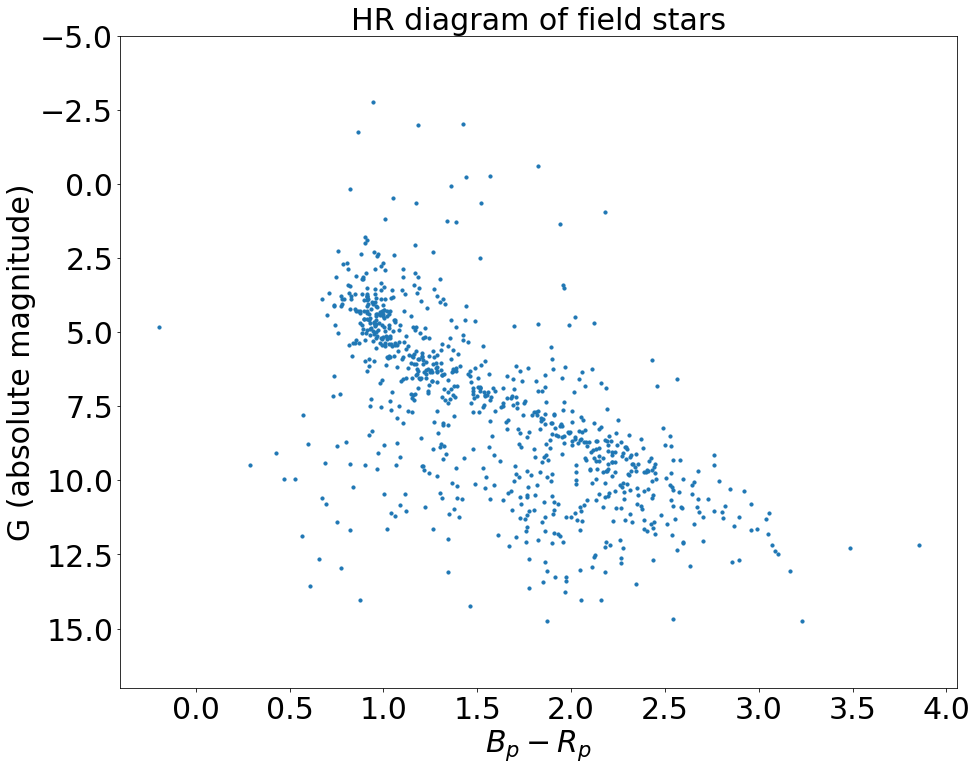

In [155]:
#import fits data
field_fits=fits.open('Greg_HW2_3_data-master/50_505_18_185.fits')
field=field_fits[1].data

### raw Pleiades data
bprp_field=field['bp_rp']
Gmag_field=field['phot_g_mean_mag']
plx_field=field['parallax']
index=plx_field>0
bprp_field=bprp_field[index]
Gmag_field=Gmag_field[index]
plx_field=plx_field[index]
G_abs_field=Gmag_field-10+5*np.log10(plx_field)


plt.figure(figsize=(15,12))
plt.scatter(bprp_field,G_abs_field,s=10)
plt.ylim(17,-5)
plt.legend(fontsize=font)
plt.tick_params(labelsize=font)
plt.xlabel('$B_{p}-R_{p}$',fontsize=font)
plt.ylabel('G (absolute magnitude)',fontsize=font)
plt.title('HR diagram of field stars',fontsize=font)
plt.savefig('HR_diagram_field.png',format='png')
plt.show()